# Introduktion till differentialekvationer med Python


I denna notebook kommer vi titta på hur man kan lösa ordinära differentialekvationer med hjälp av inbyggda funktioner i Python. Som exempel kommer vi utgå från rörelsen som sker vid ett fritt fall.

### Förberedelser: Läs in bibliotek
En styrka med Python är att det går att få tillgång till nästan vilken funktionalitet man vill genom att använda externa bibliotek med funktioner. I denna genomgång kommer vi använda oss av tre olika bibliotek. De är 
1. **NumPy** som ger tillgång till grundläggande matematiska och numeriska funktioner, samt matrishantering
2. **Matplotlib** som används för att göra figurer
3. **SciPy** som innehåller mer avancerade funktioner för vetenskapliga beräkningar som till exempel lösare för ODEer.

Vi läser in alla tre biblioteken med raderna nedan. Notera att vi vid inläsningen (importen) döper om biblioteken så de blir enklare att använda i resten av vår kod.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate

***

### Exempel 1: Hastighet vid fritt fall utan ODE
Eftersom rörelsen vid fritt fall är så enkel att beskriva behöver man egentligen inte någon numerisk ekvation utan vi kan använda enkla matematiska samband. Fritt fall betyder att accelerationen $a$ är konstant d.v.s. $a=g$ och sambandet mellan hastighet $v$ och accelerationen $a$ blir då $v = v_0 + at = v_0 + gt$.

Om vi har en uppsättning tider kan vi använda ekvationen ovan för att beräkna hastigheten vid varje tidpunkt. I Python använder vi "arrayer", som kan ses som matriser, för att beskriva våra data. En array med givna tider kan då skapas med **NumPy**-funktionen *arange(min,max,steg)* som returnerar en array med likafördelade värden mellan *min* och *max* med avståndet *steg* enligt nedan.
(Notera att funktionen heter *arange* och inte *arrange*.)

In [2]:
# Skapa en array med tider från noll till 20 sekunder med steg om 0.05 sekunder
dt = 0.05
t_min = 0.0 
t_max = 20.0
tid = np.arange(t_min, t_max, dt)

Nästa steg blir att definiera tyngdaccelerationen g.

In [3]:
g = 9.81

Med tidsarrayen och tyngdaccelerationen kan hastigheten beräknas som

In [4]:
hastighet_analytiskt=tid*g

Nu kan hastigheten ritas upp med **Matplotlib**. Man behöver alltid initiera en plot med *plt.figure()* och avsluta med *plt.show()*.

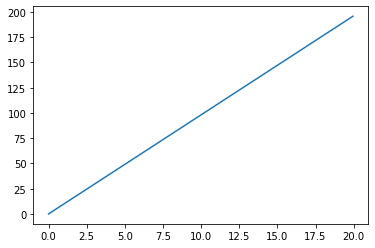

In [5]:
# Rita figur
plt.figure()
plt.plot(tid,hastighet_analytiskt)
plt.show()

Figuren ovan visar rätt data men den saknar beskrivning av axlar och vad som plottats. Det blir därför en mycket tydligare figur om vi använder fler *Matplotlib*-kommandon för att anpassa figuren. Då kan det till exempel bli som figuren nedan.

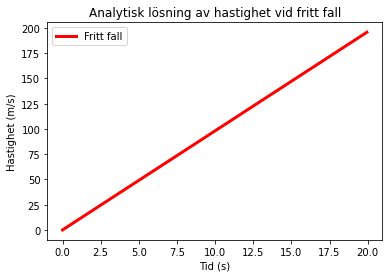

In [6]:
# Plot the data
plt.figure()
plt.plot(tid,hastighet_analytiskt,color='red',linewidth=3,label='Fritt fall')
plt.title("Analytisk lösning av hastighet vid fritt fall")
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (m/s)")
plt.legend()
plt.show()

Nu har figuren fått axlar och titel, och kurvan har fått röd färg och en tjockare linje. 
***

### Exempel 2: Hastighet vid fritt fall med ODE
Även fast rörelsen vid fritt fall är så enkel att beskriva analytiskt kan vi använda den som ett exempel för en enkel ODE-lösning med **SciPy**. 



In [7]:
def konstant_derivata(funktion, tid):

    funktionsderivatan = g

    return funktionsderivatan

#### Först: Introduktion till Pythonfunktioner och anrop
Vi kan använda samma tidsarray som i Exempel 1, men vi behöver mer information än så. **SciPy**s numeriska lösare använder information om derivatan av en funktion vid varje tid för att beräkna funktionens värde vid nästa tidpunkt. Därför behöver vi göra en Python-funktion som returnerar derivatan givet funktionen och tidpunkten. Det kan göras genom koden nedan.

Det som görs i cellen ovan är att en Python-funktion definieras enligt formen

"**def** *funktionsnamn*(*argument*)**:**"
Där både **def** och **:** behövs för att Python ska förstå att det är en funktion som definieras. 

Inne i funktionen behöver texten indenteras dvs skjutas in från vänstermarginalen med en konstant bredd (här fyra mellanslag, vilket är standard för Python). Nästa rad som börjar längst ut i vänstermarginalen kommer annars Python tolka som att funktionen är färdigdefinierad och att den raden därför inte hör till funktionen. 

För att visa hur funktioner definieras och anropas kan vi göra följande funktionsdefinition för en funktion som tar ett tal och returnerar en enkel beräkning.

In [8]:
# Första funktionsexemplet som gör en enkel beräkning och returnerar resultatet
def testfunktion_1(a):
    b = a + 1
    
    return b

Testfunktionen kan nu anropas som nedan:

In [9]:
tal = 10 
svar = testfunktion_1(tal)
print(tal,'+ 1 = ',svar)

10 + 1 =  11


Även funktionen *konstant_derivata* som definierades ovan och som behövs för vår ODE-lösning kan anropas på liknande sätt.

In [10]:
hastigheten = 10 
tiden = 0
accelerationen = konstant_derivata(hastigheten,tiden)
print("Accelerationen vid hastigheten ", hastigheten, "m och tiden ", tiden,"s är ", accelerationen," m/s^2")

Accelerationen vid hastigheten  10 m och tiden  0 s är  9.81  m/s^2


Eftersom accelerationen är konstant kommer den inte ändras även om hastigheten och/eller tiden ovan ändras.

#### Lösning av ODE med scipy.integrate
Nu kan vi använda funktionen *konstant_derivata* för att lösa rörelsen för det fria fallet numeriskt. Först behöver vi ett begynnelsevärde för hastigheten, d.v.s. $v_0$ som vi får ge enligt nedan:

In [11]:
# Begynnelsevärde för hastigheten v0
v0 = [0.0]

Det är viktigt att använda hakparanteserna '[' och ']' ovan för att **SciPy** behöver behandla begynnelsevillkoret som en array även om det egentligen bara är ett enda värde (en skalär) i det här exemplet. Med begynnelsevärdet definierat kan nu rörelsen lösas med *scipy.integrate* som anropas med funktionen som ska integreras, begynnelsevärden och arrayen för tiderna som rörelsen ska integreras för.

In [12]:
# Integrera ("lös") ODEn med scipy.integrate.
v = integrate.odeint(konstant_derivata, v0, tid)

Den beräknade hastigheten returnerades i arrayen *v* och kan nu ritas upp.

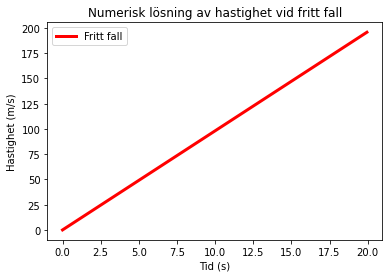

In [13]:
# Rita upp hastigheten
plt.figure()
plt.title("Numerisk lösning av hastighet vid fritt fall")
plt.plot(tid,v,'r',linewidth=3,label='Fritt fall')
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (m/s)")
plt.legend()
plt.show()

Jämför vi figuren ovan med den analytiska lösningen som gjordes tidigare ser vi att de stämmer helt överens, som de borde.
***

### Exempel 2: Hastighet och sträcka vid fritt fall med ODE
Funktionen *scipy.integrate* kan integrera fram tidsutvecklingen för flera variabler/storheter samtidigt. Det kan användas för att utöver hastigheten även beräkna sträckan för det fria fallet.

Tillvägagångssättet är väldigt likt vad som gjordes för en variabel ovan, men nu behöver funktionen utökas för att även behandla sträckan. Det görs genom att lagra alla storheter som en array. Arrayer i Python indexeras med hakparanterer och de börjar med index 0 så här vill vi använda någonting på formen "array[0]=sträcka" och "array[1]=hastighet" både för funktionen som kallas *sv* nedan samt dess derivata som kallas *dsv_dt*. 

Det kan göras enligt nedan.

In [14]:
def multipel_derivata(sv, tid):

    dsv_dt = np.zeros_like(sv)
    dsv_dt[0]=sv[1]
    dsv_dt[1]=g

    return dsv_dt

Funktionen ovan gör några nya saker jämfört med tidigare funktioner. Först används *np.zeros_like* för att skapa arrayen *dsv_dt* så att den är tom men har samma form (d.v.s. innehåller två element här) som funktionen *sv*. Sedan ges sträckans derivata av den aktuella hastigheten d.v.s. *dsv_dt[0]=sv[1]* eftersom $\frac{ds}{dt}=v$. 

På samma sätt ges hastighetens derivata som den konstanta accelerationen *g* eftersom $\frac{dv}{dt}=a=g$ vilket i funktionen nu skrivs som *dsv_dt[1]=g*.

Eftersom vi nu har två storheter som ska integreras fram behöver vi två begynnelsevärden:

In [15]:
# Begynnelsevärden s0 för sträckan s och v0 för hastigheten v 
# sv0 är alltså en array där sv0[0]=s0 och sv0[1]=v0
s0=0.0
v0=0.0
sv0 = [s0,v0]

Nu är det flerdimensionella problemet redo att lösas med *scipy.integrate* som i tidigare exempel. Eftersom lösaren returnerar sträckan och hastigheten som en tvådimensionell array *sv* delar vi upp den i sträckan *stracka* och hastigheten *hastighet* för att enklare kunna plotta dem.

In [16]:
# integrate your ODE using scipy.integrate.
sv = integrate.odeint(multipel_derivata, sv0, tid)
stracka=sv[:,0]
hastighet=sv[:,1]

Nu kan hastigheten och sträckan plottas som tidigare. Eftersom det är två olika storheter med olika enheter gör vi en figur för hastigheten och en för sträckan.

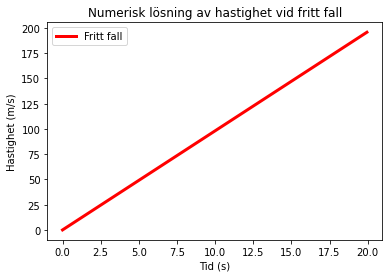

In [17]:
# Plot the data
plt.figure()
plt.title("Numerisk lösning av hastighet vid fritt fall")
plt.plot(tid,hastighet,'r',linewidth=3,label='Fritt fall')
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (m/s)")
plt.legend()
plt.show()

Ovan ser vi att vi återigen får samma svar som för den analytiska lösningen.

Sträckan kan nu också ritas upp. Den får formen av en parabel vilket stämmer eftersom integrerar vi sträckan för en konstant accelration fås $s=s_0 + v_0 t + \frac{a t^2}{2}$.

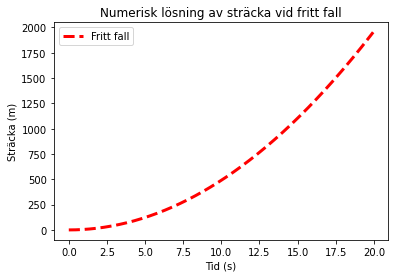

In [18]:
# Plot the data
plt.figure()
plt.title("Numerisk lösning av sträcka vid fritt fall")
plt.plot(tid,stracka,'r--',linewidth=3,label='Fritt fall')
plt.xlabel("Tid (s)")
plt.ylabel("Sträcka (m)")
plt.legend()
plt.show()

***

### Exempel 3: Hastighet och sträcka med luftmotstånd
Med maskineriet som beskrivits hittils kan man även gå vidare och lösa mer komplexa problem som kanske inte är lika enkla att lösa analytiskt som exemplen ovan. 

Ett typexempel på det är vad som händer när vi introducerar luftmotstånd i rörelsen. Luftmotstånd kan modelleras på flera olika sätt men fysikaliskt kan man se det som att ett fallande objekt påverkas av en kraft som motverkar objektets acceleration. Så vi kan här enkelt modellera luftmotståndet som ett bidrag som minskar accelerationen. I de allra flesta fall beror luftmotståndet på hastigheten, antingen linjärt ($v$) eller kvadratiskt ($v^2$), så här antar vi en linjär term.

Först definierar vi en luftmotståndsfaktor $C_D$ som egentligen beror på objektets form, ytstruktur, och massa.

In [19]:
C_D=0.30

Sedan kan funktionen som inkluderar luftmotståndet skrivas som nedan. Sträckans derivata ges som tidigare av den nuvarande hastigheten enligt $\frac{ds}{dt}=v$. Dessutom blir nu hastighetens derivata beroende på hastigheten själv och inte bara *g* eftersom $\frac{dv}{dt}=a=g-C_D v$.

In [20]:
def beroende_derivata(sv_lm, tid):

    dsva_dt = np.zeros_like(sv_lm)
    dsva_dt[0]=sv_lm[1]
    dsva_dt[1]=g-C_D*sv_lm[1]

    return dsva_dt

Som i tidigare exempel behöver vi en uppsättning begynnelsevärden för sträckan och hastigheten. 

In [21]:
# Begynnelsevärden s0 för sträckan s och v0 för hastigheten v 
# sv0 är alltså en array där sv0[0]=s0 och sv0[1]=v0
s0=0.0
v0=0.0
sv_lm0 = [s0,v0]

Nu kan **SciPy** lösa vår rörelse med luftmotstånd och vi spar återigen undan hastigheten och sträckan i två nya arrayer för enklare plottning.

In [22]:
# integrate your ODE using scipy.integrate.
sv_lm = integrate.odeint(beroende_derivata, sv_lm0, tid)
stracka_lm=sv_lm[:,0]
hastighet_lm=sv_lm[:,1]

Hastigheten ritas nedan och vi ser att nu ökar den inte längre linjärt utan hastigheten konvergerar mot ett konstant värde, en gränshastighet (Engelska: terminal velocity) där luftmotståndet motverkar tyngdaccelerationen helt.

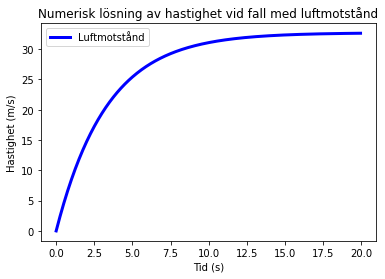

In [23]:
# Plot the data
plt.figure()
plt.title("Numerisk lösning av hastighet vid fall med luftmotstånd")
plt.plot(tid,hastighet_lm,'b',linewidth=3,label='Luftmotstånd')
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (m/s)")
plt.legend()
plt.show()

Den avtagande accelerationen betyder att sträckan, som ritas ut nedan, börjar med ett kvadratiskt beteende (konstant acceleration) för att sedan gå mer mot ett linjärt beteende (konstant hastighet).

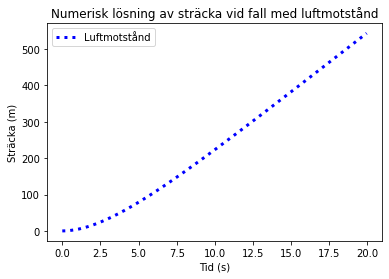

In [24]:
# Plot the data
plt.figure()
plt.title("Numerisk lösning av sträcka vid fall med luftmotstånd")
plt.plot(tid,stracka_lm,'b:',linewidth=3,label='Luftmotstånd')
plt.xlabel("Tid (s)")
plt.ylabel("Sträcka (m)")
plt.legend()
plt.show()

#### Jämförelse av rörelserna
Med alla rörelser simulerade kan vi nu jämföra hur hastigheten och sträckan ser ut med och utan luftmotstånd. Det görs bäst genom att plotta hastigheterna för de två fallen i en figur och sträckorna i en annan.

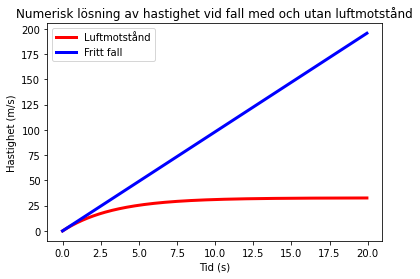

In [25]:
# Plot the data
plt.figure()
plt.title("Numerisk lösning av hastighet vid fall med och utan luftmotstånd")
plt.plot(tid,hastighet_lm,'r',linewidth=3,label='Luftmotstånd')
plt.plot(tid,hastighet,'b',linewidth=3,label='Fritt fall')
plt.xlabel("Tid (s)")
plt.ylabel("Hastighet (m/s)")
plt.legend()
plt.show()

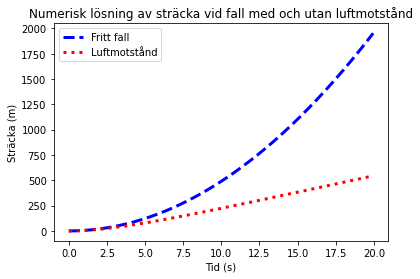

In [26]:
# Plot the data
plt.figure()
plt.title("Numerisk lösning av sträcka vid fall med och utan luftmotstånd")
plt.plot(tid,stracka,'b--',linewidth=3,label='Fritt fall')
plt.plot(tid,stracka_lm,'r:',linewidth=3,label='Luftmotstånd')
plt.xlabel("Tid (s)")
plt.ylabel("Sträcka (m)")
plt.legend()
plt.show()

***